<a href="https://colab.research.google.com/github/hyehyuni/essa/blob/main/ESAA_hw0331.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **[개념 정리]**
**3/31 과제 - 파이썬 머신러닝 완벽가이드 ch2.5~6 pg.118 ~ 145 부분**



---




# **2-5) 데이터 전처리**
##### 데이터 전터리는 ML 알고리즘만큼 중요하다. 
##### 1) 결손값, NAN, Null은 허용되지 않는다.
* Null 값은 고정된 다른 값으로 변환한다. 
* 어떤 값으로 처리할지는 경우에 따라 다르며, 간단히는 피처의 평균으로 대처할 수 있고, Null이 대부분이라면 해당 피처는 드롭하는게 좋다.

##### 2) 사이킷런의 머신러닝 알고리즘은 문자열 값을 입력 값으로 허용하지 않는다. 
* 모든 문자열 값은 인코딩돼서 숫자형으로 변환해야한다. 
* 문자열 피처는 일반적으로 카테고리형 피처와 텍스트형 피처를 의미한다. (주민번호나 단순 문자열 아이디와 같은 경우 인코딩하지 않고 삭제하는 것이 더 좋다.)

## **데이터 인코딩**
데이터 인코딩은 레이블 인코딩과 원-핫 인코딩이 대표적이다.
1.   레이블 인코딩 
*  카테고리 피처를 코드형 숫자 값으로 변환하는 것
##### 예를 들어, 상품 데이터의 상품 구분이 TV, 냉장고, 전자레인지, 컴퓨터, 선풍기, 믹서 값으로 돼 있다면 TV:1, 냉장고:2, 전자레인지:3, 컴퓨터:4, 선풍기:5, 믹서:6과 같은 숫자형 값으로 변환하는 것이다. (주의 : '01','02'와 같은 코드 값은 문자열 이므로 1,2와 같은 숫자형으로 변환한다.)


### **1) 레이블 인코딩**
사이킷런의 레이블 인코딩은 LabelEncoder 클래스로 구현한다.
LabelEncoder를 객체로 생성한 후 fit()과 transform()을 호출해 레이블 인코딩을 수행한다.

In [1]:
from sklearn.preprocessing import LabelEncoder

items=['TV', '냉장고','전자레인지','컴퓨터','선풍기','선풍기','믹서','믹서']

# LabelEncoder를 객체로 생성한 후, fit()과 transform으로 레이블 인코딩 수행 
encoder = LabelEncoder()
encoder.fit(items)
labels=encoder.transform(items)
print('인코딩 변환값:', labels)

인코딩 변환값: [0 1 4 5 3 3 2 2]


데이터가 큰 경우 어떤 숫자값으로 인코딩 됐는지 확인하기 위해서 claseese_ 속성값으로 확인한다.

In [2]:
# classes_ 속성은 0번부터 순서대로 변환된 인코딩 값에 대한 우너본값을 가진다. 
print('인코딩 클래스:', encoder.classes_)

인코딩 클래스: ['TV' '냉장고' '믹서' '선풍기' '전자레인지' '컴퓨터']


inverse_transform() : 인코딩된 값을 다시 디코딩할 수 있다.

In [3]:
print('디코딩 원본값:', encoder.inverse_transform ([4,5,2,0,1,1,3,3]))

디코딩 원본값: ['전자레인지' '컴퓨터' '믹서' 'TV' '냉장고' '냉장고' '선풍기' '선풍기']


숫자 값으로 변환할 경우 크고 작음에 대한 특성이 작용하기 때문에 예측성능이 떨어지는 경우가 발생한다. 
* 이러한 특성 때문에 레이블 인코딩은 성형 회귀와 같은 ML 알고리즘에는 적용하지 않아야한다.
* 트리 계열의 ML 알고리즘은 숫자의 이러한 특성을 반영하지 않으므로 레이블 인코딩도 별 문제가 없다.

## **원-핫 원코딩 (one-hot encoding)**
원-핫 인코딩은 피처값의 유형에 따라 새로운 피처를 축해 고유 값에 해당하는 칼럼에만 1을 표시하고, 나머지 칼럼에는 0을 표시하는 방식입니다. 

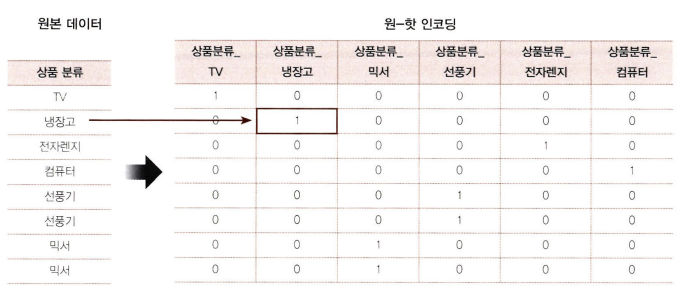

=> 상품 분류 피처를 6개의 상품 분류 고유 값 피처로 변환한다. 

원-핫 인코딩은 사이킷런에서 OneHotEncoder 클래스로 쉽게 변환이 가능하다.
* 첫번째로, OneHotEncoder로 변환하기 전에 모든 문자열 값이 숫자형 값으로 변환돼야한다.
* 두번째로, 입력 값으로 2차원 데이터가 필요하다.

In [8]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

items=['TV', '냉장고','전자레인지','컴퓨터','선풍기','선풍기','믹서','믹서']

# 먼저 숫자 값으로 변환을 위해 LabelEncoder로 변환한다.
encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)

# 2차원 데이터로 변환한다.
labels=labels.reshape(-1,1)

# 원-핫 인코딩을 적용한다. 
oh_encoder = OneHotEncoder()
oh_encoder.fit(labels)
oh_labels = oh_encoder.transform(labels)
print('원-핫 인코딩 데이터')
print(oh_labels.toarray())
print('원-핫 인코딩 데이터 차원')
print(oh_labels.shape)

원-핫 인코딩 데이터
[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]
원-핫 인코딩 데이터 차원
(8, 6)


=> 첫번째 칼럼 TV, 두번째 칼럼 냉장고, 세번째 칼럼 믹서, 네번째 칼럼 선풍기, 다섯번째 칼럼 전자레인지, 여섯번째 칼럼이 컴퓨터이다.

get_dummies() : 원핫 인코딩을 더 쉽게 지원하는 API

In [11]:
import pandas as pd

df=pd.DataFrame({'items':['TV','냉장고','전자레인지','컴퓨터','선풍기','선풍기','믹서','믹서']})

pd.get_dummies(df)

,items_TV,items_냉장고,items_믹서,items_선풍기,items_전자레인지,items_컴퓨터
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,0,0,1,0
3,0,0,0,0,0,1
4,0,0,0,1,0,0
5,0,0,0,1,0,0
6,0,0,1,0,0,0
7,0,0,1,0,0,0


##**피처 스케일링과 정규화**
피처 스케일링 : 서로 다른 변수의 값 범위를 일정한 수준으로 맞추는 작업 
##### =>  대표적인 방법으로 표준화와 정규화가 있음

1) 표준화
##### 데이터의 피처 각각이 평균이 0이고, 분산이 1인 가우시안 정규분포를 가진 값으로 변환하는 것 
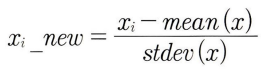

2) 정규화 
* 서로 다른 피처의 크기를 통일하기 위해 크기를 변환해주는 개념 
###### 예를 들어 피처 A는 거리를 나타내는 변수로서 값이 0 ~ 100km로 주어지고 피처 B는 금액을 나타내는 속성 값이 0~ 100,000,000,000원으로 주어진다면 이 변수를 모두 동일한 크기 단위로 비교하기 위해 모두 최소 0~ 최대1의 값으로 변환하는 것이다.
##### 즉, 개별 데이터의 크기를 모두 똑같은 단위로 변경한다.

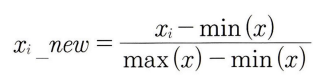



사이킷런의 전처리에서 제공하는 Normalizer 모듈과 일반적인 정규화는 약간의 차이가 있다.
* Normalizer 모듈은 선형대수에서의 정규화 개념이 적용됐으며, 개별 벡터의 크기를 맞추기 위해 변환하는 것을 의미한다.
* 즉, 개별 벡터를 모든 피처 벡터의 크기로 나눠준다. 

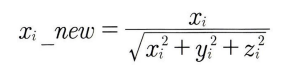

##**StandardScaler**
표준화를 쉽게 지원하기 위한 클래스 
* 개별 피처를 평균이 0이고, 분산이 1인 값으로 변환해준다.
* RBF 커널을 이용하는 서포트 벡터 머신, 선형회귀, 로지스틱 회귀는 데이터가 가우시안 분포를 가지고 있다고 가정하므로 표준화를 적용하면 예측 성능이 향상된다

In [13]:
from sklearn.datasets import load_iris
import pandas as pd

# 붓꽃 데이터 세트를 로딩하고 DataFrame으로 변환한다. 
iris = load_iris()
iris_data=iris.data
iris_df=pd.DataFrame(data=iris_data, columns=iris.feature_names)

print('feature들의 평균 값')
print(iris_df.mean())
print('\n feature들의 분산 값')
print(iris_df.var())

feature들의 평균 값
sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64

 feature들의 분산 값
sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
dtype: float64


In [15]:
# StandardScaler를 이용해 각 피처를 한번에 표준화 

from sklearn.preprocessing import StandardScaler

# StandardScaler 객체 생성 
scaler = StandardScaler()
# StandardScaler로 데이터 세트 변환, fit()과 transform() 호출 
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

# transform()시 스케일 변환된 데이터 세트가 Numpy ndarray로 반환돼 이를 DataFrame으로 변환 
iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
print('feature들의 평균 값')
print(iris_df_scaled.mean())
print('\nfeature들의 분산 값')
print(iris_df_scaled.var())

feature들의 평균 값
sepal length (cm)   -1.690315e-15
sepal width (cm)    -1.842970e-15
petal length (cm)   -1.698641e-15
petal width (cm)    -1.409243e-15
dtype: float64

feature들의 분산 값
sepal length (cm)    1.006711
sepal width (cm)     1.006711
petal length (cm)    1.006711
petal width (cm)     1.006711
dtype: float64


## **MinMaxScaler**
데이터 값을 0과 1 사이의 범위 값으로 변환한다. (음수 값이 있다면 -1과 1 사이의 값으로 변환한다.)

In [16]:
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
scaler = MinMaxScaler()
# MinMaxScaler로 데이터 세트 변환. fit()과 transform() 호출.
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

# transform() 시 스케일 변환된 데이터 세트가 NumPy ndarray로 반환돼 이를 DataFrame으로 변환
iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
print('feature들의 최솟값')
print(iris_df_scaled.min())
print('feature들의 최댓값')
print(iris_df_scaled.max())

feature들의 최솟값
sepal length (cm)    0.0
sepal width (cm)     0.0
petal length (cm)    0.0
petal width (cm)     0.0
dtype: float64
feature들의 최댓값
sepal length (cm)    1.0
sepal width (cm)     1.0
petal length (cm)    1.0
petal width (cm)     1.0
dtype: float64


## **학습 데이터와 테스트 데이터의 스케일링 변환시 유의점**
fit_transform() : fit()과 transform()을 한번에 적용하는 기능을 수행
* 주의할점 
##### Sclaer 객체를 이용해 학습 데이터 세트로 fit()과 transform()을 적용하면 테스트 데이터 세트로는 다시 fit()을 수행하지 않고 학습 데이터 세트로 fit()을 수행한 결과를 이용해 transform() 변환을 적용해야한다. 
##### 즉, 학습 데이터로 fit()이 적용된 스케일링 기준 정보를 그대로 테스트 데이터에 적용해야하며, 그렇지 않고 테스트 데이터로 다시 새로운 스케일링 기준 정보를 만들게 되면 정보가 서로 달라지며 올바른 예측 결과가 안나옴

In [17]:
# 테스트 데이터에 fit()을 적용하면 생기는 문제점 

from sklearn.preprocessing import MinMaxScaler
import numpy as np

# 학습 데이터는 0부터 10까지, 테스트 데이터는 0부터 5까지 값을 가지는 데이터 세트로 생성
# Scaler 클래스의 fit(), transform()은 2차원 이상 데이터만 가능하므로 reshape(-1,1)로 차원 변경
train_array = np.arange(0, 11).reshape(-1, 1)
test_array = np.arange(0, 6).reshape(-1, 1)

# MinMaxScaler 객체의 별도의 feature_range 파라미트 값을 지정하지 않으면 0~1 값으로 변환
scaler = MinMaxScaler()

# fit()하게 되면 train_array 데이터의 최솟값이 0, 최댓값이 10으로 설정.
scaler.fit(train_array)

# 1/10 scale로 train_array 데이터 변환함. 원본 10 -> 1 로 변환됨.
train_scaled = scaler.transform(train_array)

print('원본 train_array 데이터:', np.round(train_array.reshape(-1), 2))
print('Scale된 train_array 데이터:', np.round(train_scaled.reshape(-1), 2))

원본 train_array 데이터: [ 0  1  2  3  4  5  6  7  8  9 10]
Scale된 train_array 데이터: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


In [18]:
# MinMaxScaler에 test_array를 fit()하게 되면 원본 데이터의 최솟값이 0, 최댓값이 6로 설정됨
scaler.fit(test_array)

# 1/5 Scale로 test_array 데이터를 변환함. 원본 5 -> 1 로 변환.
test_scaled = scaler.transform(test_array)

# test_array의 scale 변환 출력.
print('원본 test_array 데이터:', np.round(test_array.reshape(-1), 2))
print('Scale된 test_array 데이터:', np.round(test_scaled.reshape(-1), 2))

원본 test_array 데이터: [0 1 2 3 4 5]
Scale된 test_array 데이터: [0.  0.2 0.4 0.6 0.8 1. ]


=> 출력 결과를 확인하면 학습 데이터와 테스트 데이터의 스케일링이 맞지 않음을 알 수 있다. 원본값 1이 학습데이터에서는 0.1이었다면 테스트 데이터에서는 0.2이다.

=> 따라서 학습 데이터로 이미 fit()이 적용된 scaler 객체를 이용해 transform()으로 변환해야한다.

In [19]:
scaler = MinMaxScaler()
scaler.fit(train_array)
train_scaled = scaler.transform(train_array)
print('원본 train_array 데이터:', np.round(train_array.reshape(-1), 2))
print('Scale된 train_array 데이터:', np.round(train_scaled.reshape(-1), 2))

# test_array에 Scale 변환을 할 때는 반드시 fit()을 호출하지 않고 transform()만으로 변환해야 함.
test_scaled = scaler.transform(test_array)
print('\n원본 test_array 데이터:', np.round(test_array.reshape(-1), 2))
print('Scale된 test_array 데이터:', np.round(test_scaled.reshape(-1), 2))

원본 train_array 데이터: [ 0  1  2  3  4  5  6  7  8  9 10]
Scale된 train_array 데이터: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]

원본 test_array 데이터: [0 1 2 3 4 5]
Scale된 test_array 데이터: [0.  0.1 0.2 0.3 0.4 0.5]


# **2-6) 사이킷런으로 수행하는 타이타닉 생존자 예측**

타이타닉 탑승자 데이터 설명

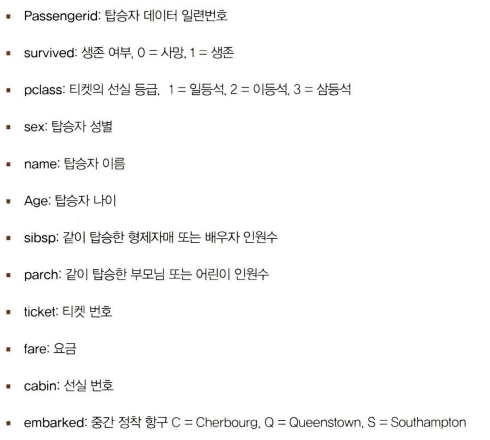

In [21]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
titanic_df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/esaa/자료/train.csv')
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [24]:
# 데이터 칼럼 정보 확인 
print('\n ###학습 데이터 정보###\n')
print(titanic_df.info())


 ###학습 데이터 정보###

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


* RangeIndex는 DataFrame 인덱스의 범위를 나타내므로 전체 로우 수를 알 수 있다. 

In [26]:
# Null값 처리하기
titanic_df['Age'].fillna(titanic_df['Age'].mean(),inplace=True) # 평균 나이로 변경
titanic_df['Cabin'].fillna('N',inplace=True) # 'N'으로 변경
titanic_df['Embarked'].fillna('N',inplace=True)
print('데이터 세트 Null 값 개수',titanic_df.isnull().sum().sum)

데이터 세트 Null 값 개수 <bound method NDFrame._add_numeric_operations.<locals>.sum of PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64>


In [27]:
# 남아있는 문자열 피처 분류 확인하기 
print('sex 값 분포:\n',titanic_df['Sex'].value_counts())
print('\n Cabin 값 분포:\n',titanic_df['Cabin'].value_counts())
print('\n Embarked 값 분포:\n',titanic_df['Embarked'].value_counts())

sex 값 분포:
 male      577
female    314
Name: Sex, dtype: int64

 Cabin 값 분포:
 N              687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: Cabin, Length: 148, dtype: int64

 Embarked 값 분포:
 S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64


=> 'C23', ' C25', 'C27'과 같이 여러 Cabin이 한꺼번에 표기된 Cabin 값이 4건이 된다. Cabin의 경우 선실 등급을 나타내는 첫번째 알파벳이 중요해보이므로 앞 문자만 추출한다.

In [28]:
titanic_df['Cabin']=titanic_df['Cabin'].str[:1]
print(titanic_df['Cabin'].head(3))

0    N
1    C
2    N
Name: Cabin, dtype: object


성별에 따른 생존자 수 비교하기

In [30]:
titanic_df.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

=> Survived 칼럼은 0이 사망, 1이 생존이다. 

<Axes: xlabel='Sex', ylabel='Survived'>

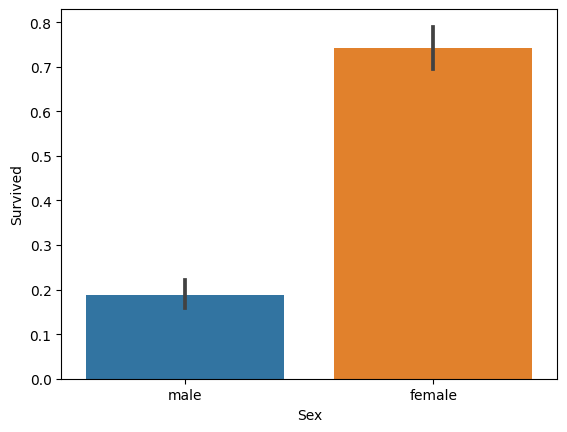

In [31]:
sns.barplot(x='Sex',y='Survived',data=titanic_df)

부자와 가난한 사람 간의 생존 확률 비교하기 (성별도 함께 고려)

=> 부는 객실 등급으로 측정한다

<Axes: xlabel='Pclass', ylabel='Survived'>

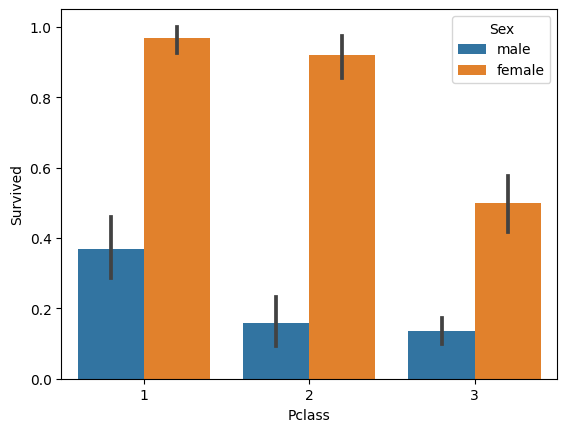

In [32]:
sns.barplot(x='Pclass',y='Survived',hue='Sex',data=titanic_df)

=> 여성의 경우 일, 이등실에 따른 생존 확률의 차이는 크지 않으나 삼등실의 경우 생존 확률이 상대적으로 많이 떨어진다. 남자의 경우 일등실의 생존 확률이 월등히 높다.

Age에 따른 생존 확률 살펴보기 
* 0~5 세는 baby
* 6~12 세는 child 
* 13~18 세는 teenager
* 19~25 세는 student
* 26~35 세는 Young Adult
* 36~60 세는 Adult
* 61세 이상은 Elderly

In [34]:
def get_category(age):
  cat=''
  if age<=-1:cat='Unknown'
  elif age<=5:cat='Baby'
  elif age <=12:cat='Child'
  elif age<=18:cat='Teenager'
  elif age<=25:cat='Student'
  elif age<=35:cat='Young Adult'
  elif age<=60:cat='Adult'
  else: cat='Elderly'

  return cat

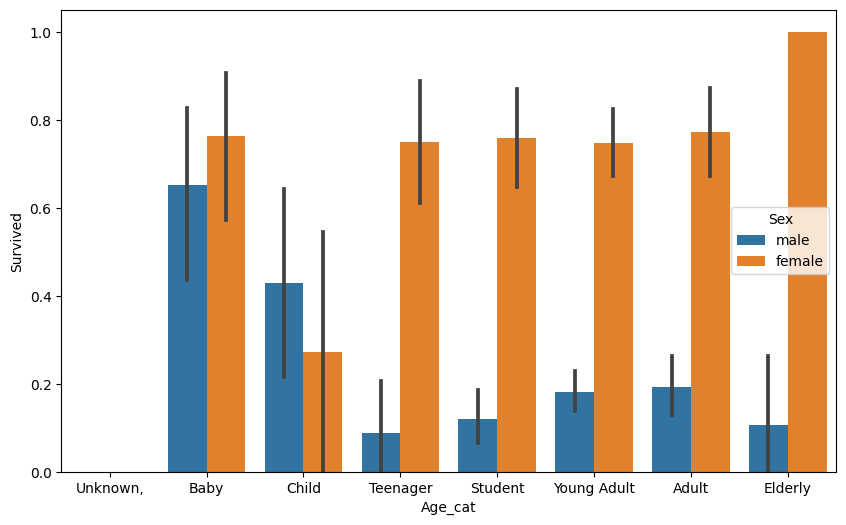

In [35]:
#막대그래프의 크기 figure 를 더 크게 설정
plt.figure(figsize=(10,6))

#X축의 값을 순차적으로 표시하기 위한 설정
group_names=['Unknown,','Baby','Child','Teenager','Student','Young Adult','Adult','Elderly']

#lambda 식에 위에서 생성한 get_category() 함수를 반환값으로 지ㅣ정
#get_category(X)는 입력갑으로 'Age'칼럼 값을 받아서 해당하는 cat 반환
titanic_df['Age_cat']=titanic_df['Age'].apply(lambda x:get_category(x))
sns.barplot(x='Age_cat',y='Survived',hue='Sex',data=titanic_df,order=group_names)
titanic_df.drop('Age_cat',axis=1,inplace=True)
     

=> baby의 경우 생존 확률이 비교적 높음

문자열 카테고리 피처를 숫자형 카테고리 피처로 변환하기

In [36]:
from sklearn import preprocessing 


def encode_features(dataDF):
  features=['Cabin','Sex','Embarked']
  for feature in features:
    le=preprocessing.LabelEncoder()
    le=le.fit(dataDF[feature])
    dataDF[feature]=le.transform(dataDF[feature])

  return dataDF

titanic_df=encode_features(titanic_df)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3


* 데이터 전처리를 전체적으로 호출하는 함수는 transform_features()이며 Null 처리, 포매팅, 인코딩을 수행하는 내부 함수로 구성

In [37]:
# 피처를 가공한 내역을 정리하고 이를 함수로 만들어 쉽게 재사용할 수 있도록하기 
#Null 처리 함수
def fillna(df):
  df['Age'].fillna(df['Age'].mean(),inplace=True)
  df['Cabin'].fillna('N',inplace=True)
  df['Embarked'].fillna('N',inplace=True)
  df['Fare'].fillna(0,inplace=True)

  return df

#머신러닝 알고리즘에 불필요한 속성제거
def drop_features(df):
  df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
  return df

#레이블 인코딩 수행
def format_features(df):
  df['Cabin']=df['Cabin'].str[:1]
  features=['Cabin','Sex','Embarked']
  for feature in features:
    le=LabelEncoder()
    le=le.fit(df[feature])
    df[feature]=le.transform(df[feature])

  return df

#앞에서 설정한 데이터 전처리 함수 호출
def transform_features(df):
  df=fillna(df)
  df=drop_features(df)
  df=format_features(df)
  return df

새롭게 만든 함수를 이용해 다시 원본 데이터를 가공 

In [38]:
titanic_df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/esaa/자료/train.csv')
y_titanic_df=titanic_df['Survived']
X_titanic_df=titanic_df.drop('Survived',axis=1)

X_titanic_df=transform_features(X_titanic_df)

테스트 데이터 세트 크기를 20%로 하여 테스트 데이터 세트 추출하기

In [39]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_titanic_df,y_titanic_df,test_size=0.2,random_state=11)

1. ML 알고리즘은 결정트리, 랜덤 포레스트, 로지스틱 회귀 이용하기 
* 결정트리 : DecisionTreeClassifier
* 랜덤 포레스트 : RandomForestClassifier
* 로지스틱 회귀 : LogisticRegression 

In [41]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 결정트리, 랜덤포레스트, 로지스틱 회귀를 위한 사이킷런 Classifier 클래스 생성
dt_clf=DecisionTreeClassifier(random_state=11)
rf_clf=RandomForestClassifier(random_state=11)
lr_clf=LogisticRegression()


# DecisionTreeClassifier 학습/예측/평가
dt_clf.fit(X_train,y_train)
dt_pred=dt_clf.predict(X_test)
print('DecisionTreecClassifier 정확도:{0:.4f}'.format(accuracy_score(y_test,dt_pred)))


# RandomForestClassifier 학습/예측/평가
rf_clf.fit(X_train,y_train)
rf_pred=rf_clf.predict(X_test)
print('RandomForestClassifier 정확도{0:.4f}'.format(accuracy_score(y_test,rf_pred)))

# 로지스틱회귀 학습/예측/평가
lr_clf.fit(X_train,y_train)
lr_pred=lr_clf.predict(X_test)
print('LogisticRegression 정확도{0:.4f}'.format(accuracy_score(y_test,lr_pred)))

DecisionTreecClassifier 정확도:0.7877
RandomForestClassifier 정확도0.8547
LogisticRegression 정확도0.8492


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


=> 3개의 알고리즘 중 로지스틱이 높은 정확도를 나타냄

2. 교차 검증으로 결정 트리 모델

In [42]:
from sklearn.model_selection import KFold

def exec_kfold(clf, folds=5):
  # 폴드 세트를 5개인 KFold객체를 생성, 폴드 수만큼 예측결과 저장을 위한 리스트 객체 생성.
  kfold = KFold(n_splits=folds)
  scores=[]

  # KFold 교차 검증 수행.
  for iter_count, (train_index, test_index) in enumerate(kfold.split(X_titanic_df)):
    # X_titanic_df 데이터에서 교차 검증별로 학습과 검증 데이터를 가리키는 index 생성
    X_train, X_test = X_titanic_df.values[train_index], X_titanic_df.values[test_index]
    y_train, y_test = y_titanic_df.values[train_index], y_titanic_df.values[test_index]
    # Classifier 학습, 예측, 정확도 계산
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    scores.append(accuracy)
    print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count, accuracy))

  # 5개 fold에서의 평균 정확도 계산
  mean_score = np.mean(scores)
  print("평균 정확도: {0:.4f}".format(mean_score))

# exec_kfold 호출
exec_kfold(dt_clf, folds=5)

교차 검증 0 정확도: 0.7542
교차 검증 1 정확도: 0.7809
교차 검증 2 정확도: 0.7865
교차 검증 3 정확도: 0.7697
교차 검증 4 정확도: 0.8202
평균 정확도: 0.7823


=> 평균 정확도는 약 78.23%이다. 

3. 교차 검증을 cross_val_score()를 이용해 수행

In [43]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt_clf, X_titanic_df, y_titanic_df, cv=5)
for iter_count, accuracy in enumerate(scores):
  print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count, accuracy))

print("평균 정확도: {0:.4f}".format(np.mean(scores)))

교차 검증 0 정확도: 0.7430
교차 검증 1 정확도: 0.7753
교차 검증 2 정확도: 0.7921
교차 검증 3 정확도: 0.7865
교차 검증 4 정확도: 0.8427
평균 정확도: 0.7879


=> cross_val_score()와 방금 전 K 폴드의 평균 정확도가 약간 다른데, 이는 cross_val_score()가 StratifiedKFold를 이용해 폴드 세트를 분할하기 때문이다.

4. CridSearchCV를 이용해 DecisionTreeClassifier의 최적 하이퍼 파라미터를 찾고 예측 성능을 측정하기

In [44]:
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth':[2,3,5,10], 'min_samples_split':[2,3,5], 'min_samples_leaf':[1,5,8]}

grid_dclf = GridSearchCV(dt_clf, param_grid=parameters, scoring='accuracy', cv=5)
grid_dclf.fit(X_train, y_train)

print('GridSearchCV 최적 하이퍼 파라미터 :', grid_dclf.best_params_)
print('GirdSearchCV 최고 정확도: {0:.4f}'.format(grid_dclf.best_score_))
best_dclf = grid_dclf.best_estimator_

# GridSearchCV의 최적 하이퍼 파라미터로 학습된 Estimator로 예측 및 평가 수행.
dpredictions = best_dclf.predict(X_test)
accuracy = accuracy_score(y_test, dpredictions)
print('테스트 세트에서의 DecisionTreeClassifier 정확도 : {0:.4f}'.format(accuracy))

GridSearchCV 최적 하이퍼 파라미터 : {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
GirdSearchCV 최고 정확도: 0.7992
테스트 세트에서의 DecisionTreeClassifier 정확도 : 0.8715


=> 최적화된 하이퍼 파라미터인 max_depth = 2,min_samples_leaf = 1, min_samples_split = 2로 DecisionTreeClassifier를 학습시킨 뒤 예측 정확도가 약 87.15%로 향상

## **2-7) 정리**

**1. 사이킷런**
* 매우 많은 머신러닝 알고리즘을 제공하며, 쉽고 직관적인 API 프레임 워크, 편리하고 다양한 모듈을 지원한다.



**2. 머신러닝 애플리케이션 구성**
* 데이터 가공 및 변환 과정의 전처리 작업 
* 데이터를 학습 데이터와 테스트 데이터로 분리하는 데이터세트 분리 자겁 
* 학습된 모델을 기반으로 테스트 데이터에 대한 예측을 수행
* 예측된 결과 값을 실제 결괏값과 비교해 머신러닝 모델에 대한 평가를 수행

**3. 데이터 전처리 작업**
* 오류 데이터의 보정이나 결손값 처리 등의 데이터 클렌징 작업 
* 레이블 인코딩이나 원-핫 인코딩 작업 
* 데이터 스케일링/정규화 작업 



머신러닝 모델은 학습 데이터 세트로 학습한 뒤 반드시 별도의 테스트 데이터 세트로 평가되어야 한다. 또한 테스트 데이터의 건수 부족이나 고정된 테스트 데이터 세트를 이용한 반복적인 모델의 학습과 평가는 해당 테스트 데이터 세트에만 치우친 빈약한 모델을 만들 가능성이 높아진다.

=> 학습 데이터세트를 학습 데이터와 검증 데이터로 구성된 여러 개의 폴드 세트로 분리해 교차검증 수행하기
=> KFold, StratifiedKFold, cross_val_score() 등의 다양한 클래스와 함수, GridSearchCV(최적의 하이퍼 파라미터 추출)